In [19]:
import pdb

import sys
sys.path.append("../utils")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# utils
from GenreSubsetter import *

## Import and transform data to work with time series

In [7]:
genres_df = pd.read_csv("../data/interum/top_genres.csv")
genres_df = genres_df[(genres_df.Super_genre != "general") & (genres_df.release_date_precision == 'day')]


In [8]:
def convert_datetime(x):
    try:
        return pd.to_datetime(x)
    except:
        return np.NaN
        
        
genres_df.release_date = genres_df.release_date.apply(convert_datetime)

In [11]:
genres_df.set_index("release_date", inplace=True)

## Plot Features in timeseries by genre

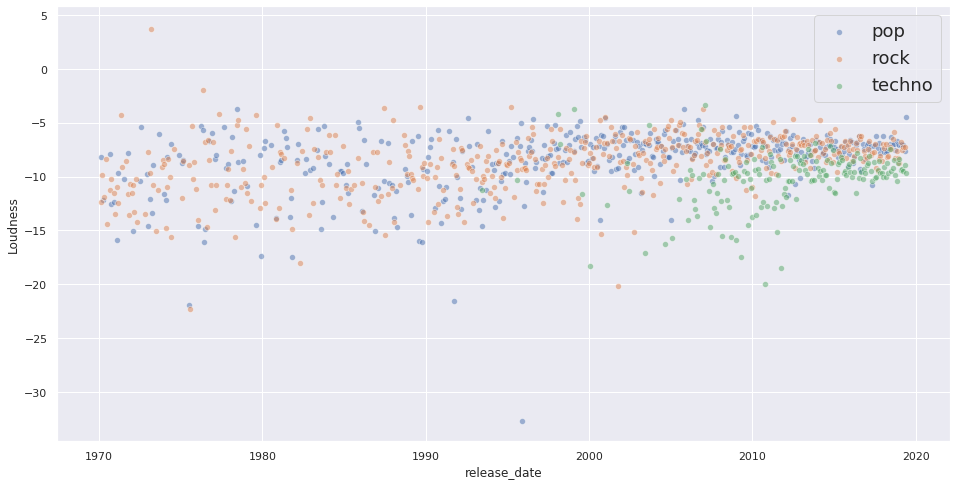

In [63]:
pop_df = GenreSubsetter.get_genre_subset(genres_df, ['pop'])
rock_df = GenreSubsetter.get_genre_subset(genres_df, ['rock'])
techno_df = GenreSubsetter.get_genre_subset(genres_df, ['techno'])


pop_ts = pop_df["1970":].resample('m').mean()
rock_ts = rock_df["1970":].resample('m').mean()
techno_ts = techno_df["1970":].resample('m').mean()

plt.figure(figsize=(16, 8))

sns.scatterplot(pop_ts.index, pop_ts.Loudness, data=pop_ts, alpha=0.5)
sns.scatterplot(rock_ts.index, rock_ts.Loudness, data=rock_ts, alpha=0.5)
sns.scatterplot(techno_ts.index, techno_ts.Loudness, data=techno_ts, alpha=0.5)

plt.legend(["pop", "rock", "techno"], fontsize=18)